# Imports

* **PIL:** Python Imaging Library.
* **Keras:** High-level Deep Learning library.
  * [Documentación de Keras](https://keras.io/)
  * [Documentación de los modelos usables en Keras](https://keras.io/applications/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
%matplotlib inline

/home/kopita/anaconda3/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Cargar un modelo preentrenado

In [2]:
# Cargamos un modelo previamente entrenado en la variable model
model = ResNet50(weights='imagenet')

In [3]:
# Vemos el tamaño del input que espera el modelo
model.input

<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>

(?, 224, 224, 3)
Es un tensor de 4 dimensiones:
* **?** -> batch size (la cantidad de iagenes), el símbolo de interrogación indica que esta dimensión puede variar.
* **224, 224** -> las dimensiones de la imagen (width, height)
* **3** -> Los canales de la imagen (RGB)

*Ej: Un tensor con las dimensiones (8, 224, 224, 3), puede almacenar 8 imágenes a color de tamaño 224x224.*

# Cargar una imagen

(880, 587)


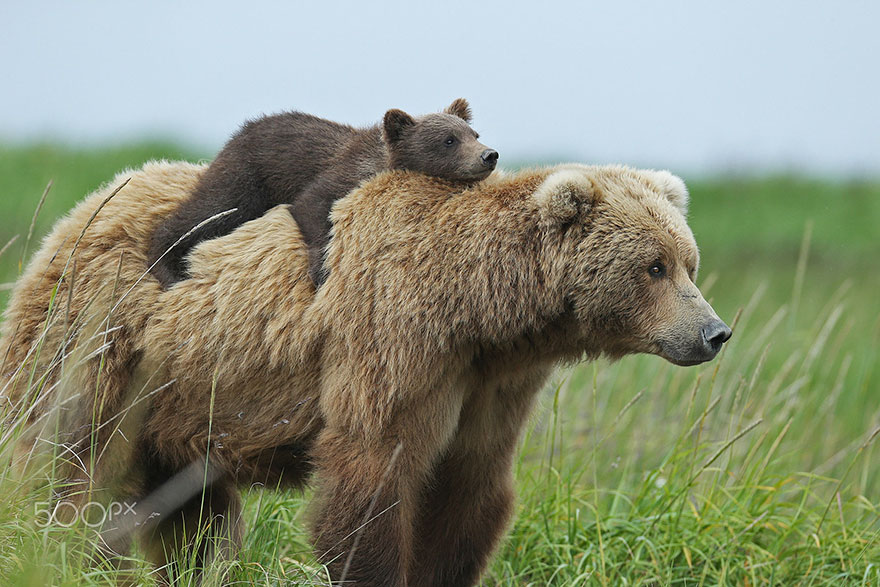

In [4]:
path = 'imgs/bear.jpg'
img = Image.open(path)
print(img.size)
img

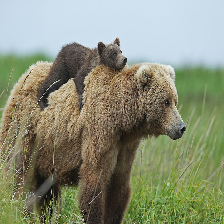

In [5]:
# Ajustamos la imagen al tamaño de model.input
img_resized = img.resize((224, 224))
img_resized

## Llevar la imagen a un array de numpy

In [6]:
# Llevamos la imagen a un array de tipo float32 (por defecto es un array de números enteros)
x = np.asarray(img_resized, np.float32)
x.shape

(224, 224, 3)

## Manipular shapes en numpy

In [8]:
# Vemos que en el shape nos hace falta la dimensión del batch size
# Ajustamos las dimensiones
# En arrays de numpy podemos agregar dimensiones indicando un None
# Ej:
x[None].shape

(1, 224, 224, 3)

In [9]:
# El símbolo ":" nos ayuda a indicar todos los elementos de una dimensión,
# de forma que si queremos seleccionar solo un canal de la imagen,
# podemos hacerlo de esta manera:
x[:,:,0].shape

(224, 224)

In [10]:
# Si queremos añadir una dimensión en otra parte del array,
# podemos ayudarnos con el símbolo ":"
x[:,:,None].shape

(224, 224, 1, 3)

In [11]:
# Y si queremos añadir una dimensión al final del array,
# podemos usar el símbolo "..."
x[..., None].shape

(224, 224, 3, 1)

## Agregamos la dimensión del batch size

In [12]:
x = x[None]
x.shape

(1, 224, 224, 3)

# Usando el modelo

## Preprocess

Usualmente al entrenar un modelo, se aplica alguna función de procesamiento a los inputs (ej: normalizar los datos). Asi que al usar un modelo preentrenado, es importante aplicar la misma función de preprocesamiento de datos.

In [13]:
# Utilizamos el preprocesing del modelo
x = preprocess_input(x)

## Obtener predicciones

In [14]:
# Obtenemos los resultados del modelo
y = model.predict(x)
y.shape

(1, 1000)

El shape del array (1, 1000) se refiere a (batch_size, predicciones), dado que en ImageNet se tienen 1000 clases, cada uno de estos 1000 números se refiere a una clase y su valor indica la probabilidad de la imagen de pertenecer a dicha clase.

In [15]:
y[0, :10]

array([7.8859168e-09, 3.1060980e-09, 2.8199484e-08, 6.6306844e-09,
       6.7004562e-09, 3.3323520e-08, 8.4571106e-09, 7.2369964e-08,
       3.7087183e-08, 1.6827139e-06], dtype=float32)

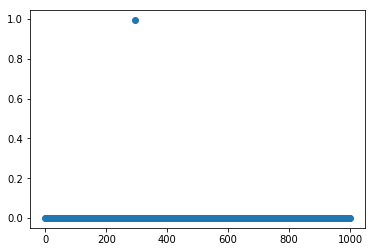

In [16]:
# Visualizamos las predicciones
plt.plot(y[0], 'o');

In [17]:
# Usamos la función "decode_predictions" para obtener el nombre de las 5 clases
# con más altas probabilidades
preds = decode_predictions(y)
preds

[[('n02132136', 'brown_bear', 0.9944541),
  ('n02486410', 'baboon', 0.001152999),
  ('n02117135', 'hyena', 0.0008175589),
  ('n02133161', 'American_black_bear', 0.0006953974),
  ('n02410509', 'bison', 0.00045081135)]]

# Ejercicio

Dado el path de una imagen, retornar las top 5 predicciones del modelo.

In [18]:
def get_class(path):
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    img_resized = img.resize((224, 224))
    x = np.asarray(img_resized, np.float32)[None]
    x = preprocess_input(x)
    y = model.predict(x)
    preds = decode_predictions(y)
    
    return preds

[[('n02129604', 'tiger', 0.84580535),
  ('n02123159', 'tiger_cat', 0.15358096),
  ('n02391049', 'zebra', 0.00024426897),
  ('n02128925', 'jaguar', 8.277509e-05),
  ('n02127052', 'lynx', 7.553906e-05)]]

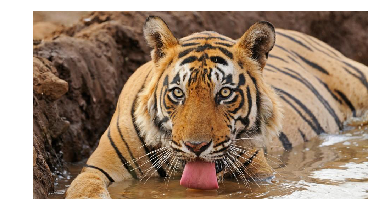

In [19]:
get_class('imgs/tiger.jpg')

[[('n02107908', 'Appenzeller', 0.8899642),
  ('n02107574', 'Greater_Swiss_Mountain_dog', 0.06454526),
  ('n02108000', 'EntleBucher', 0.013698069),
  ('n02107683', 'Bernese_mountain_dog', 0.010620661),
  ('n02110806', 'basenji', 0.009557424)]]

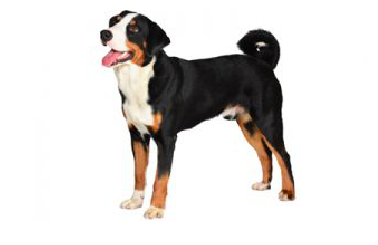

In [20]:
get_class('imgs/dog1.jpg')

[[('n02088364', 'beagle', 0.7728196),
  ('n02089867', 'Walker_hound', 0.17623763),
  ('n02089973', 'English_foxhound', 0.029853996),
  ('n02088238', 'basset', 0.019162742),
  ('n02088632', 'bluetick', 0.0010491252)]]

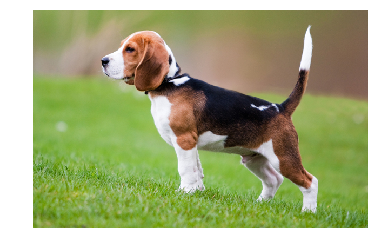

In [21]:
get_class('imgs/dog2.jpg')

[[('n04536866', 'violin', 0.7265836),
  ('n02992211', 'cello', 0.27017656),
  ('n02676566', 'acoustic_guitar', 0.00047956483),
  ('n03527444', 'holster', 0.00035759347),
  ('n03272010', 'electric_guitar', 0.00035428334)]]

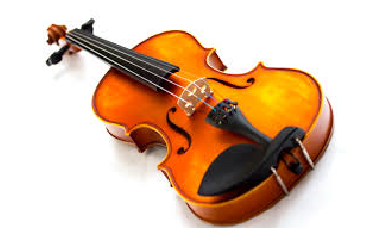

In [22]:
get_class('imgs/violin.jpeg')